#CRISP-DM - CUSTOMER CHURN CLASSIFICATION USING XGBOOST CLASSIFIER

#Business Understanding

## Data Dictionary

Deskripsi data: Seorang manajer bisnis portofolio kartu kredit konsumen menghadapi masalah pengurangan pelanggan. Mereka ingin menganalisis data untuk mengetahui alasan di balik ini dan memanfaatkan hal yang sama untuk memprediksi pelanggan yang kemungkinan besar akan berhenti.

Masalah yang terjadi:
Pengurangan jumlah customers

Solusi dan manfaat yang diberikan:
Melakukan pemodelan menggunakan data-data yang telah dikumpulkan untuk menganalisis masalah yang terjadi, memprediksi jumlah atau ciri-ciri tertentu dari pelanggan yang berkemungkinan berhenti berlangganan, dan dapat meningkatkan pelayanan berdasarkan kesimpulan yang dihasilkan.

Deskripsi dari setiap data yang akan diolah, yaitu:

| column | description |
| ------ | ----------- |
| `CLIENTNUM` | Client or customer number. Unique identifier for the customer holding the account|
| `Attrition_Flag` | Customer activity (Attrited or Existing Customer) |
| `Customer_Age` | Customer's Age in Years |
| `Gender` | Customers gender (M = Male, F = Female) |
| `Dependent_count` | Number of customers dependents |
| `Education_Level` | Educational Qualification of the account holder (example: high school, college graduate, etc.) |
| `Marital_Status` | Marital status of the customers (Married, Single, Divorced, Unknown) |
| `Income_Category` | Annual Income Category of the account holder (<$40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K |
| `Card_Category` |  Type of Card (Blue, Silver, Gold, Platinum) |
| `Months_on_book` | Period of relationship with bank |
| `Total_Relationship_Count` | Total number of products held by the customer |
| `Months_Inactive_12_mon` |Number of months inactive accounts in the last 12 months |
| `Contacts_Count_12_mon` | Number of Contacts in the last 12 months |
| `Credit_Limit` | Credit Limit on the Credit Card |
| `Total_Revolving_Bal` | Total Revolving Balance on the Credit Card |
| `Avg_Open_To_Buy` | Open to Buy Credit Line (Average of last 12 months) |
| `Total_Amt_Chng_Q4_Q1` | Change in Transaction Amount (Q4 over Q1) |
| `Total_Trans_Amt` | Total Transaction Amount (Last 12 months) |
| `Total_Trans_Ct` | Total Transaction Count (Last 12 months) |
| `Total_Ct_Chng_Q4_Q1` | Change in Transaction Count (Q4 over Q1) |
| `Avg_Utilization_Ratio` | Average Card Utilization Ratio |

##Akses Github

In [40]:
!git clone https://github.com/srndhn23/RGFile

fatal: destination path 'RGFile' already exists and is not an empty directory.


##Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

#EDA

##Akses File

In [42]:
customer_churn = pd.read_csv('/content/RGFile/BankChurners.csv')
customer_churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


##Drop Columns

Menghapus 3 kolom di bawah ini, karena tidak diperlukan dan akan mengganggu pengolahan data.

In [43]:
customer_churn = customer_churn.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis = 1)
customer_churn = customer_churn.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)
customer_churn = customer_churn.drop(['CLIENTNUM'], axis = 1)

In [44]:
customer_churn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##Shape

In [45]:
print(f'Number of rows: {customer_churn.shape[0]}\nNumber of columns: {customer_churn.shape[1]}')

Number of rows: 10127
Number of columns: 20


##Info

In [46]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Bersih, tidak ada missing value

##Numerical dan Categorical

In [47]:
numerical_features = customer_churn.select_dtypes(include="number").columns.tolist()
categorical_features = customer_churn.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features, compact=True)
print("------------------------------------------------------------------------")
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['Customer_Age', 'Dependent_count', 'Months_on_book',
 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
------------------------------------------------------------------------
Categorical features:
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
 'Income_Category', 'Card_Category']


##Numerical Describe

In [48]:
customer_churn[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


> **Insights:** 

*   Nilai pada kolom `Credit_Limit`, `Avg_Open_To_Buy`, dan `Total_Trans_Amt` jauh lebih besar dari kolom lainnya. Kemungkinan besar memiliki banyak outlier dan terlihat right-skewed
*   Selain 3 kolom di atas, nilainya cenderung sama



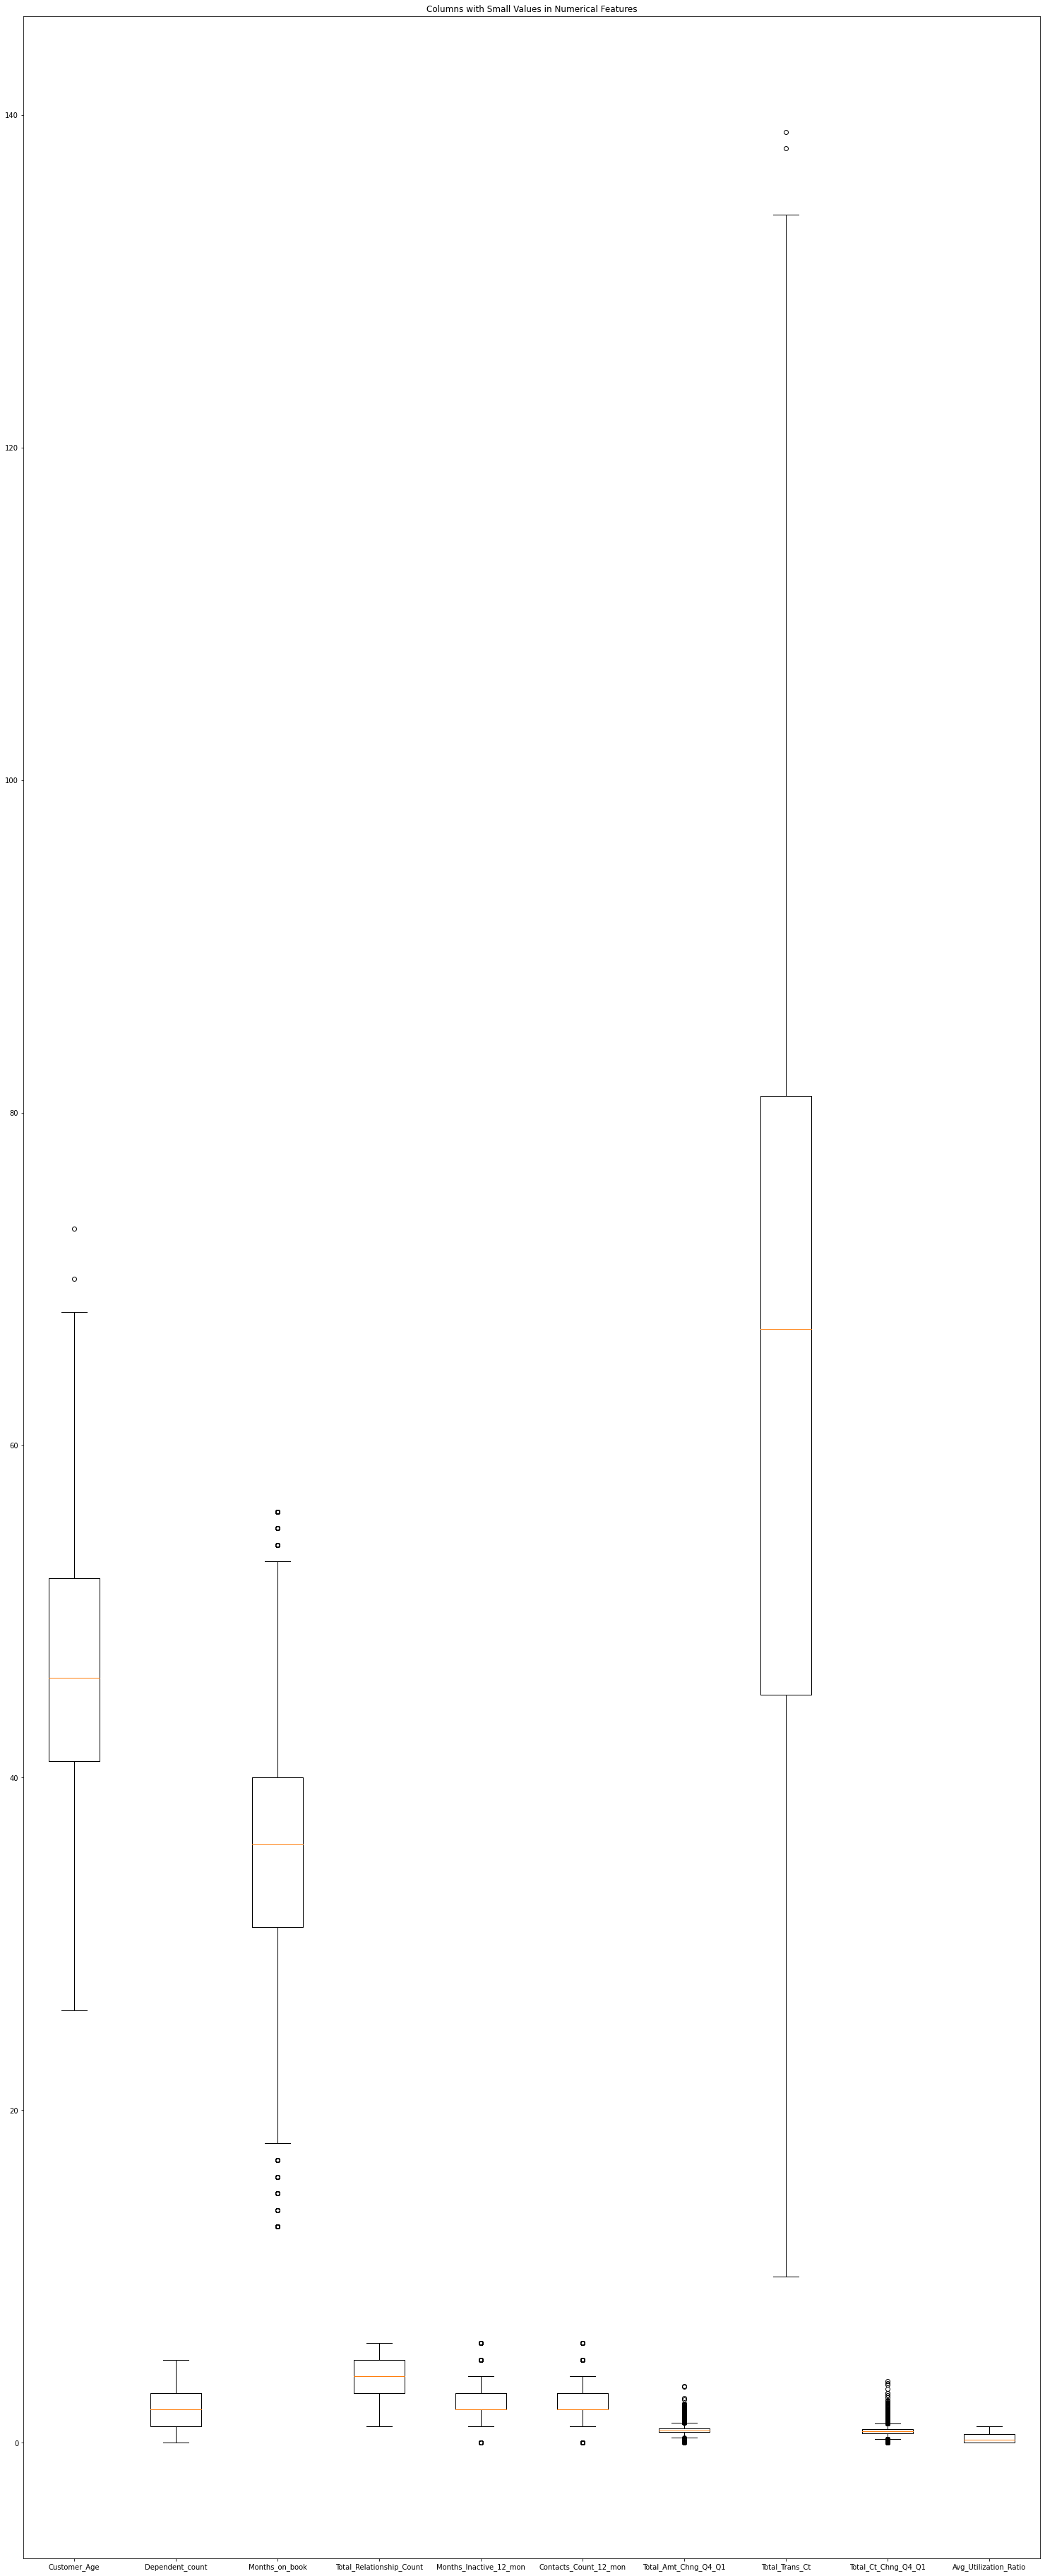

'plt.figure(figsize=(12, 6))\nsns.boxplot(x="Customer_Age",  data=customer_churn)\nplt.show()'

In [49]:
fig = plt.figure(figsize =(20, 50))
data1 = customer_churn['Customer_Age']
data2 = customer_churn['Dependent_count']
data3 = customer_churn['Months_on_book']
data4 = customer_churn['Total_Relationship_Count']
data5 = customer_churn['Months_Inactive_12_mon']
data6 = customer_churn['Contacts_Count_12_mon']
data7 = customer_churn['Total_Amt_Chng_Q4_Q1']
data8 = customer_churn['Total_Trans_Ct']
data9 = customer_churn['Total_Ct_Chng_Q4_Q1']
data10 = customer_churn['Avg_Utilization_Ratio']
numf_small = [data1 , data2, data3, data4, data5, 
              data6, data7, data8, data9, data10]
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(numf_small)

# x-axis labels
ax.set_xticklabels(['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
                                        'Months_Inactive_12_mon', "Contacts_Count_12_mon", 'Total_Amt_Chng_Q4_Q1', 
                                        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'])
 
# Adding title
plt.title("Columns with Small Values in Numerical Features")

# show plot
plt.show()



'''customer_churn[numfeat].plot(kind="box", figsize=(10, 5))
plt.grid(False)
plt.show()'''

'''plt.figure(figsize=(12, 6))
sns.boxplot(x="Customer_Age",  data=customer_churn)
plt.show()'''

> **Insights:**

* Boxplot di atas telah dipisahkan dengan kolom-kolom yang memiliki nilai sangat besar (`Credit_Limit`, `Avg_Open_To_Buy`, dan `Total_Trans_Amt`) agar mudah melihat visualisasinya
* Terlihat hampir seluruh kolom memiliki banyak outlier dan right-skewed.
* Nilai dalam kolom `Customer_Age`, `Months_on_book`, dan `Total_Trans_Ct` memilki nilai yang besar dan agak jauh dari kolom lainnya.
* Selain kolom `Customer_Age`, `Months_on_book`, dan `Total_Trans_Ct` memiliki median yang cenderung sama.

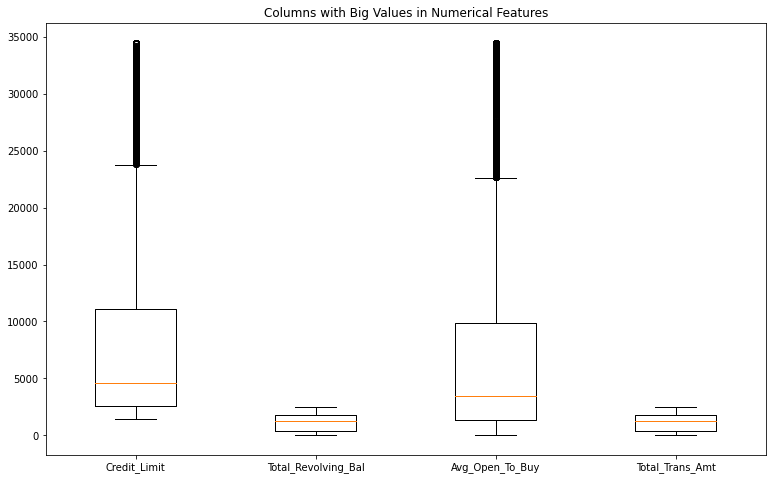

In [50]:
fig = plt.figure(figsize =(10, 6))
data1 = customer_churn['Credit_Limit']
data2 = customer_churn['Total_Revolving_Bal']
data3 = customer_churn['Avg_Open_To_Buy']
data4 = customer_churn['Total_Revolving_Bal']
numf_big = [data1 , data2, data3, data4]
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(numf_big)

# x-axis labels
ax.set_xticklabels(['Credit_Limit', 'Total_Revolving_Bal', "Avg_Open_To_Buy", 'Total_Trans_Amt'])
 
# Adding title
plt.title("Columns with Big Values in Numerical Features")
# show plot
plt.show()

> **Insights:**

* Pemisahan 4 kolom di atas diperlukan, karena jika tidak dipisahkan akan mengganggu visualisasi boxplot yang dilakukan, melihat dari nilai min dan max yang sangat besar dibandingan dengan kolom yang lain yang memiki nilai jauh lebih kecil seperti pada boxplot sebelumnya.
* Kolom `Credit_Limit` dan `Avg_Open_To_Buy` adalah right-skewed yang memiliki banyak sekali outlier.
* Kolom `Total_revolving_Bal` dan `Total_Trans_Amt` bersih dari outlier dan memiliki nilai summary yang sama.

##Categorical Describe

In [51]:
customer_churn[categorical_features].describe().T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


##Correlation

In [52]:
customer_churn.corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


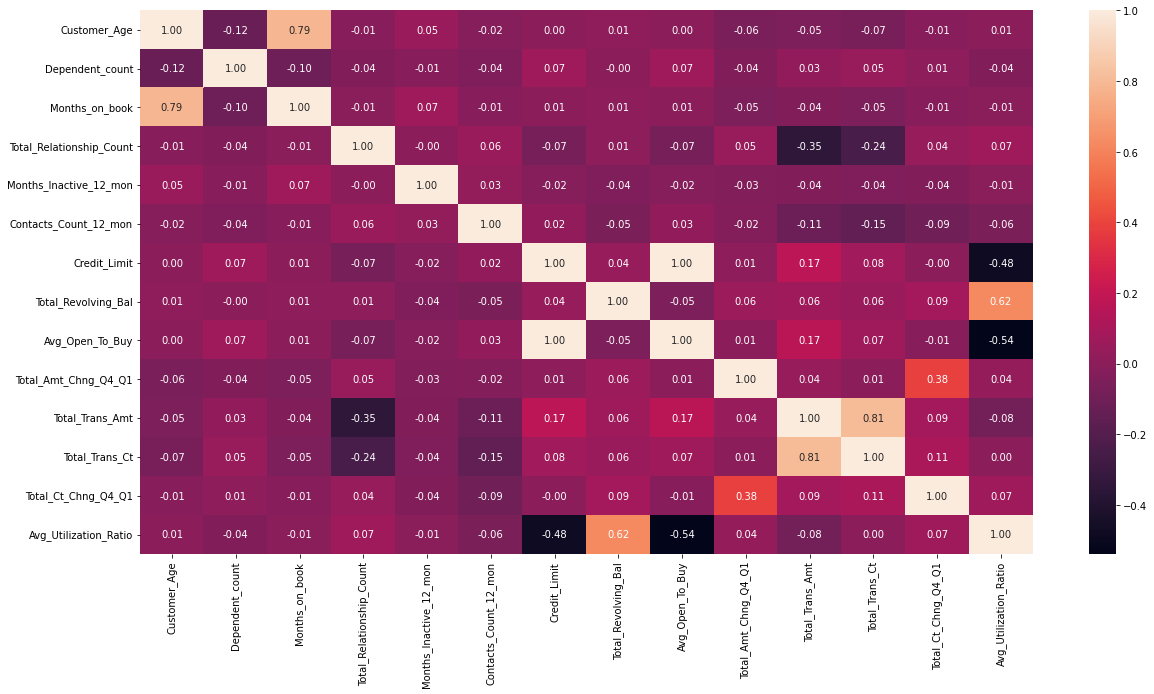

In [53]:
plt.figure(figsize=(20, 10))
sns.heatmap(customer_churn.corr(), annot=True, fmt=".2f")
plt.show()

> **Insights:** 

* Terlihat rata - rata korelasi antar numerical columns berada di angka 0.00
* Ada 7 kolom yang berwarna hitam, menandakan korelasi kolom tersebut strong negative.
* Ada 9 kolom yang berwarna sedikit terang menandakan korelasi kolom tersebut positive.
* Korelasi kolom diagonal kiri atas ke kanan bawah menandakan itu adalah kolom yang sama, karena korelasi yang begitu tinggi alias strong positive.

##Categorical Unique

In [54]:
customer_churn[categorical_features].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [55]:
customer_churn[categorical_features].nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [56]:
for feature in categorical_features:
    print(customer_churn[feature].value_counts())
    print ('------')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------
F    5358
M    4769
Name: Gender, dtype: int64
------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------


##Visualization

###Customer Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d9d5b1f10>]],
      dtype=object)

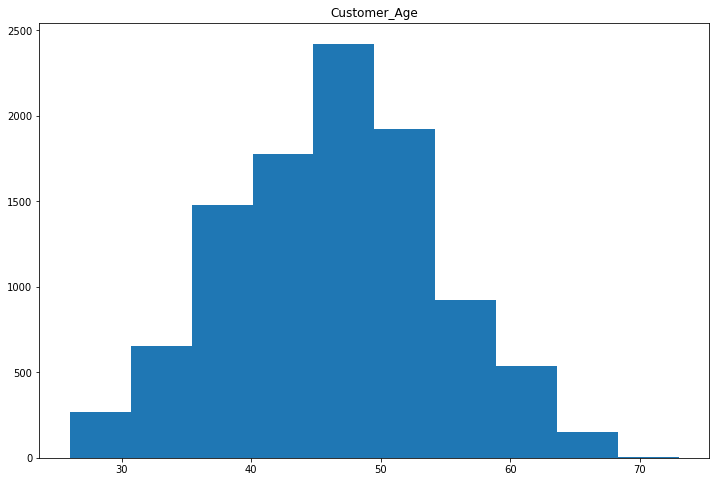

In [57]:
customer_churn.hist('Customer_Age', bins=10, grid=False, figsize=(12,8))

> **Insights:** 

* Untuk kolom Customer_Age, visualisasi histogram di atas menandakan distribusi normal.
* Range umur terbanyak yang memiliki akun bank, yaitu 44-49 tahun.

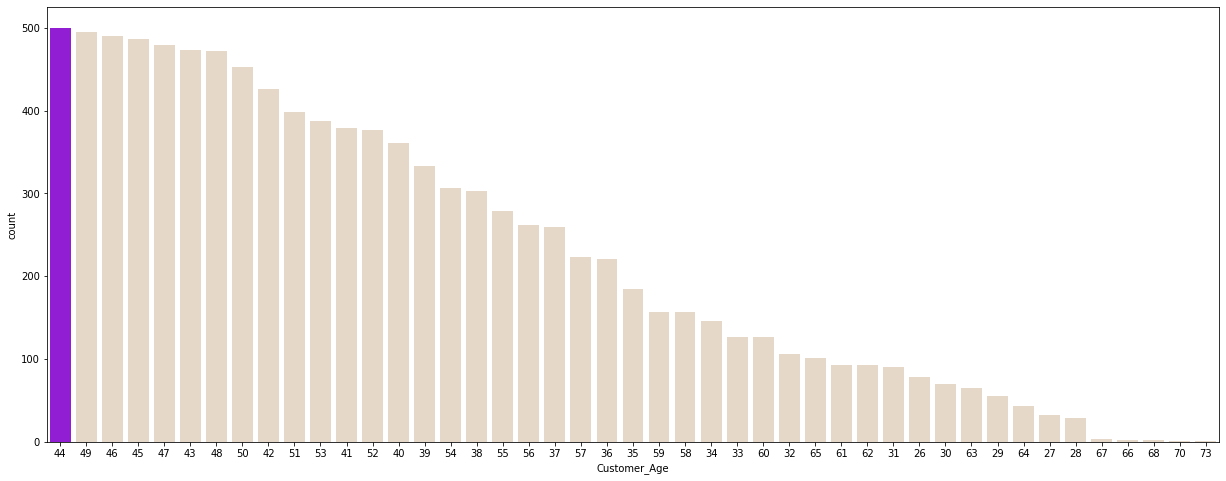

In [58]:
cust_age = customer_churn.Customer_Age.value_counts().index

plt.figure(figsize=(21, 8))
sns.countplot(
    x="Customer_Age",
    data=customer_churn,
    order=cust_age,
    palette=["#9900F0"] + (len(cust_age)-1)*["#EBD8C3"]
)
plt.grid(False)
plt.show()

Untuk lebih detailnya dari kesimpulan histogram tadi, dapat dilihat pada gambar di atas. Nilai terbanyak pada umur 44 tahun dengan jumlah sekitar 500 orang, dan range umur 67-73 tahun memiliki angka yang relatif lebih sedikit dengan kisaran antara 1-50 orang.

###Income Category

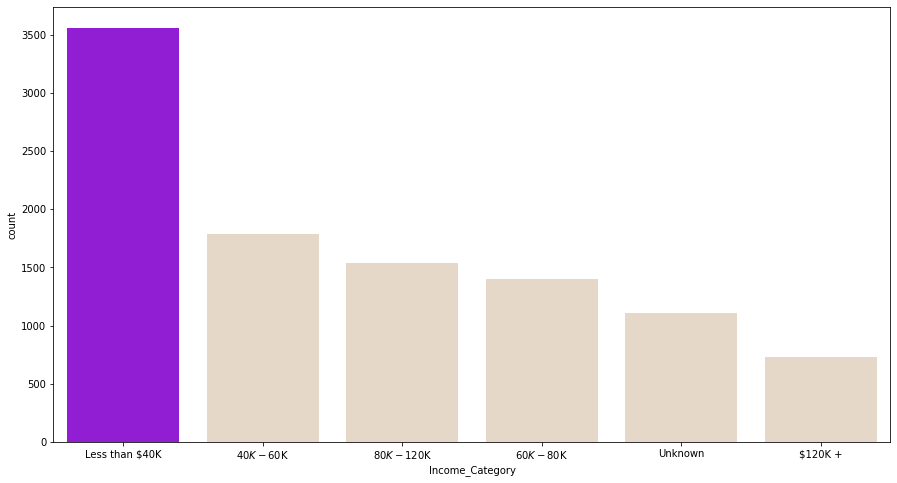

In [59]:
cust_income = customer_churn.Income_Category.value_counts().index

plt.figure(figsize=(15, 8))
sns.countplot(
    x="Income_Category",
    data=customer_churn,
    order=cust_income,
    palette=["#9900F0"] + (len(cust_income)-1)*["#EBD8C3"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Untuk melihat customers yang berhenti menjadi nasabah bank, bisa dilihat dari salary (income/pemasukkan) yang diterima oleh para customers, status pernikahan, jumlah tanggungan, tingkat pendidikan, dan jenis kelamin.
* Pada plot pemasukan para customers, paling banyak memiliki income kurang dari 40 ribu dollar, sejumlah sekitar 3500 orang.
* Bisa diyakini, kemungkinan besar customers yang berhenti pun yang memiliki pemasukan tersebut.

###Attrition Flag

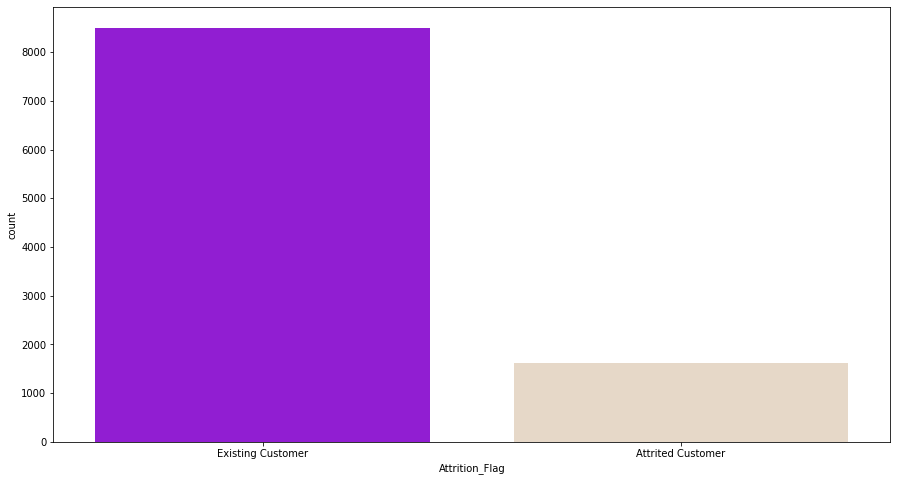

In [60]:
cust_flag = customer_churn.Attrition_Flag.value_counts().index

plt.figure(figsize=(15, 8))
sns.countplot(
    x="Attrition_Flag",
    data=customer_churn,
    order=cust_flag,
    palette=["#9900F0"] + (len(cust_flag)-1)*["#EBD8C3"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Jumlah existis customers atau customers aktif adalah sekitar 8500 orang dan attrited customers atau customers yang berhenti adalah hampir 2000 orang. Angka yang cukup lumayan untuk kehilangan customers dari jumlah customers aktif yang ada.

####Income terhadap attrition flag

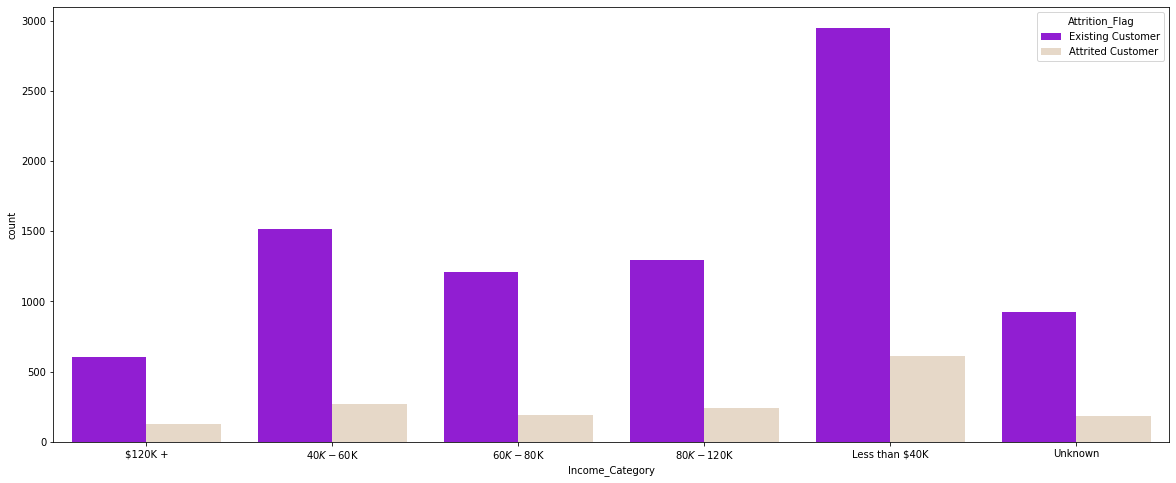

In [61]:
plt.figure(figsize=(20, 8))
sns.countplot(
    x="Income_Category",
    data=customer_churn,
    hue="Attrition_Flag",
    order=sorted(customer_churn.Income_Category.unique()),
    palette=["#9900F0"] + ["#EBD8C3"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Dibuktikan dengan plot di atas, bahwa customers yang berhenti paling banyak yang memiliki income kurang dari 4 ribu dollar.

###Marital Status

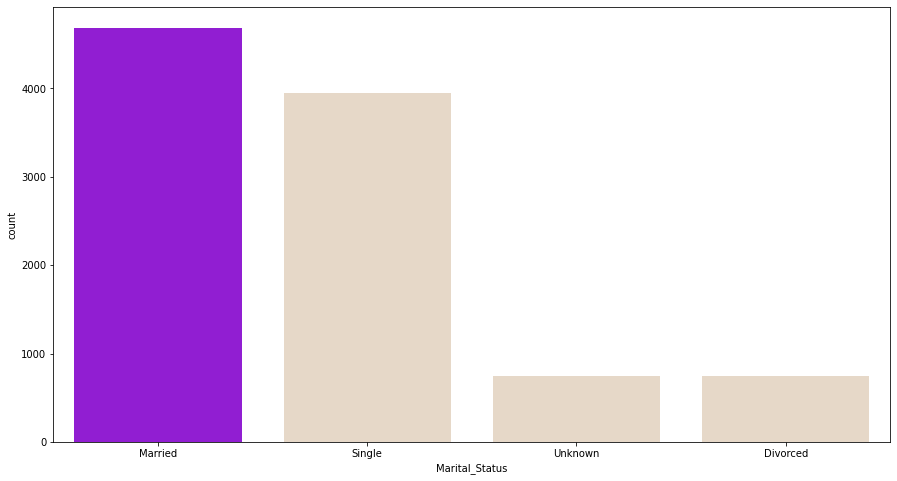

In [62]:
cust_ms = customer_churn.Marital_Status.value_counts().index

plt.figure(figsize=(15, 8))
sns.countplot(
    x="Marital_Status",
    data=customer_churn,
    order=cust_ms,
    palette=["#9900F0"] + (len(cust_ms)-1)*["#EBD8C3"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Sekitar 5000 customers adalah orang yang sudah menikah.

####Income terhadap marital status

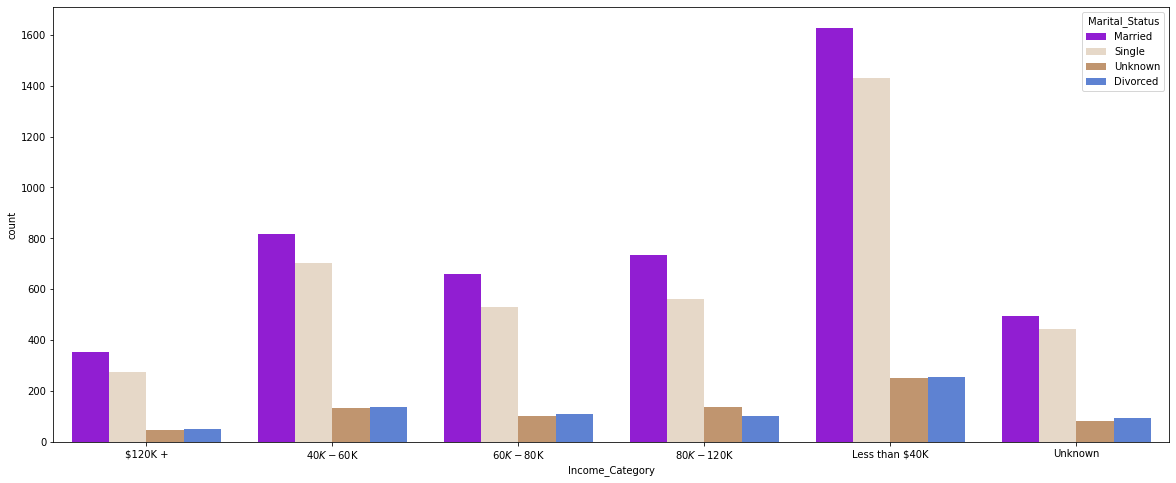

In [63]:
plt.figure(figsize=(20, 8))
sns.countplot(
    x="Income_Category",
    data=customer_churn,
    hue="Marital_Status",
    order=sorted(customer_churn.Income_Category.unique()),
    palette=["#9900F0"] + ["#EBD8C3"] + ["#CE9461"] + ["#4B7BE5"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Cukup jelas perbedaannya dari pemilik income kurang dari 40 ribu dollar yang menikah dan single. Dua kategori tersebut mendominasi jumlah customers.

###Dependent Counts

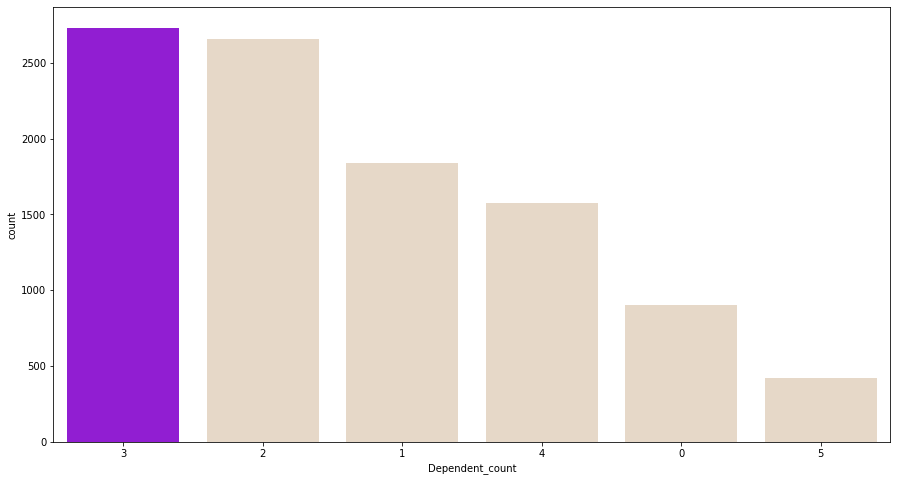

In [64]:
cust_dc = customer_churn.Dependent_count.value_counts().index

plt.figure(figsize=(15, 8))
sns.countplot(
    x="Dependent_count",
    data=customer_churn,
    order=cust_dc,
    palette=["#9900F0"] + (len(cust_dc)-1)*["#EBD8C3"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Bagi customers yang memiliki tanggungan, paling banyak memiliki 3 tanggungan dengan jumlah hampir 3000 customers.

####Income terhadap dependent count

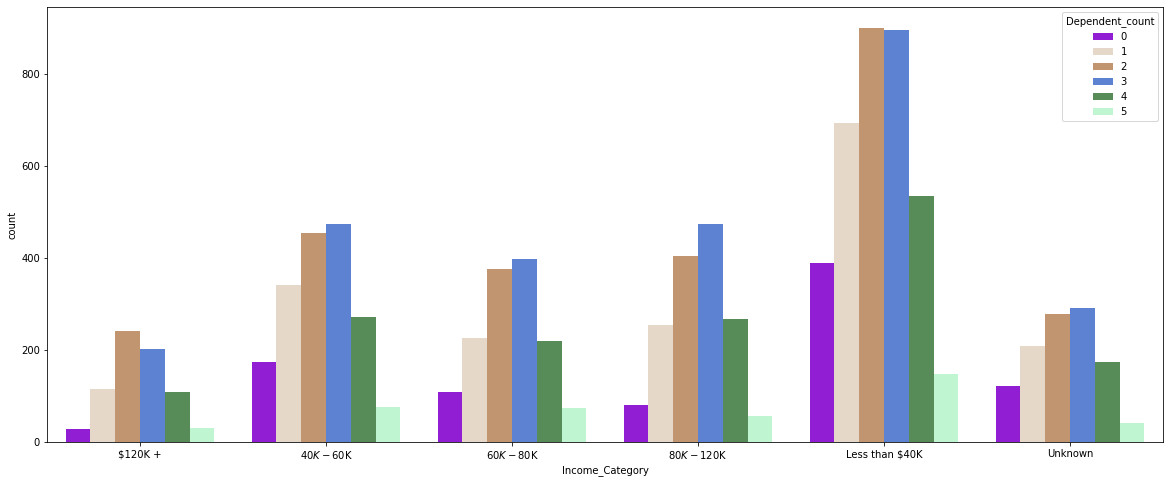

In [65]:
plt.figure(figsize=(20, 8))
sns.countplot(
    x="Income_Category",
    data=customer_churn,
    hue="Dependent_count",
    order=sorted(customer_churn.Income_Category.unique()),
    palette=["#9900F0"] + ["#EBD8C3"] + ["#CE9461"] + ["#4B7BE5"] + ["#4E944F"] + ["#B6FFCE"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Terlihat, ternyata pada customers dengan pemasukkan kurang dari 40 ribu dollar, paling banyak memiliki 2 tanggungan disusul dengan yang memiliki 3 tanggungan. Angka yang tipis.

###Educational Level

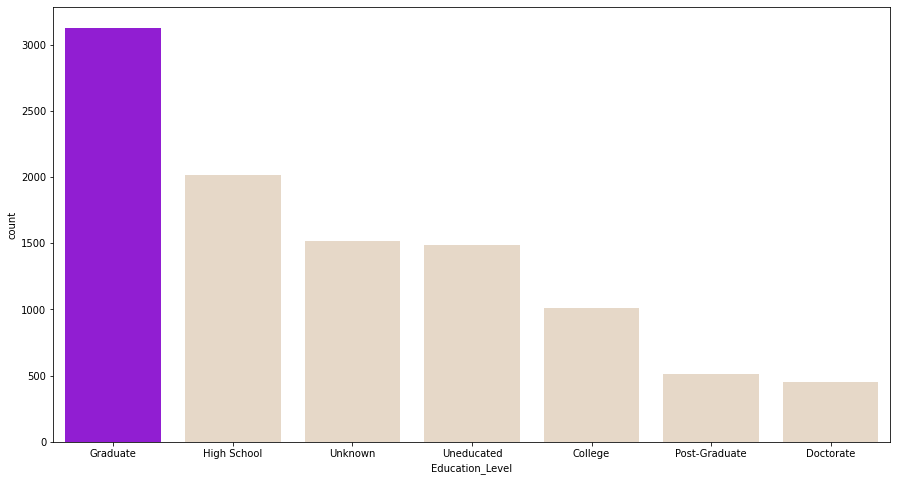

In [66]:
cust_el = customer_churn.Education_Level.value_counts().index

plt.figure(figsize=(15, 8))
sns.countplot(
    x="Education_Level",
    data=customer_churn,
    order=cust_el,
    palette=["#9900F0"] + (len(cust_el)-1)*["#EBD8C3"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Customers yang sudah lulus kuliah setara S1 yang paling banyak memiliki akun bank.

####Income terhadap educational level

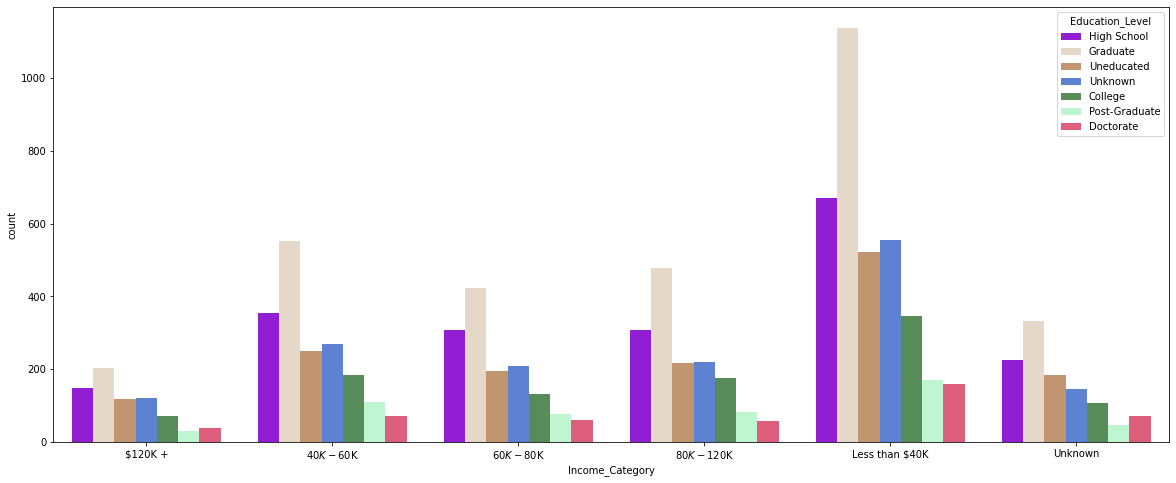

In [67]:
plt.figure(figsize=(20, 8))
sns.countplot(
    x="Income_Category",
    data=customer_churn,
    hue="Education_Level",
    order=sorted(customer_churn.Income_Category.unique()),
    palette=["#9900F0"] + ["#EBD8C3"] + ["#CE9461"] + ["#4B7BE5"] + ["#4E944F"] + ["#B6FFCE"] + ["#F24A72"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Tentunya para customers yang lulusan setara S1 tersebut yang memiliki income kurang dari 40 ribu dollar. Jumlahnya paling banyak daripada kategori yang lain. Sama dengan jumlah pemasukkan yang lain, graduate customers mendominasi.

###Gender

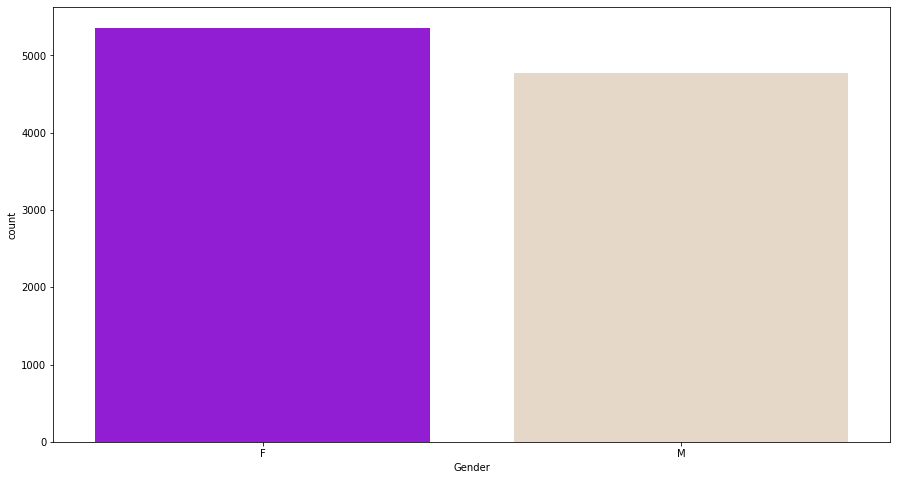

In [68]:
cust_gender = customer_churn.Gender.value_counts().index

plt.figure(figsize=(15, 8))
sns.countplot(
    x="Gender",
    data=customer_churn,
    order=cust_gender,
    palette=["#9900F0"] + (len(cust_gender)-1)*["#EBD8C3"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Untuk jenis kelamin, hampir sama banyak antara male dan female, namun male lebih banyak.

####Income terhadap gender


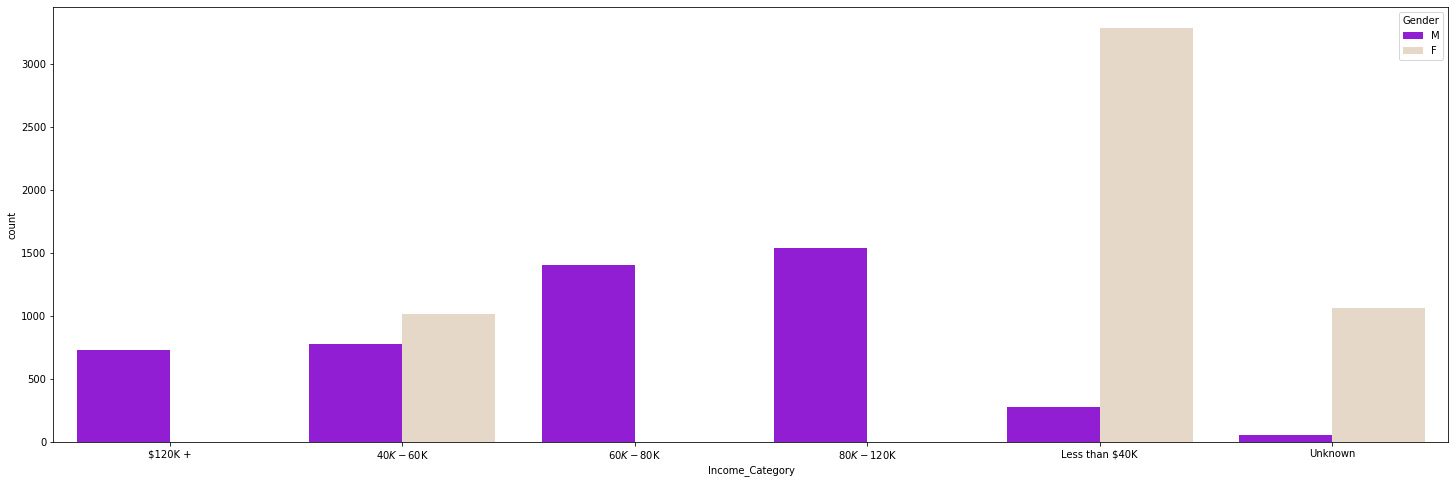

In [69]:
plt.figure(figsize=(25, 8))
sns.countplot(
    x="Income_Category",
    data=customer_churn,
    hue="Gender",
    order=sorted(customer_churn.Income_Category.unique()),
    palette=["#9900F0"] + ["#EBD8C3"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Ternyata, walaupun jumlah male terbanyak, yang memiliki pemasukkan kurang dari 40 ribu dollar adalah female. Jadi, kemungkinan besar customers yang berhenti berjenis kelamin female (perempuan).

###Card Category

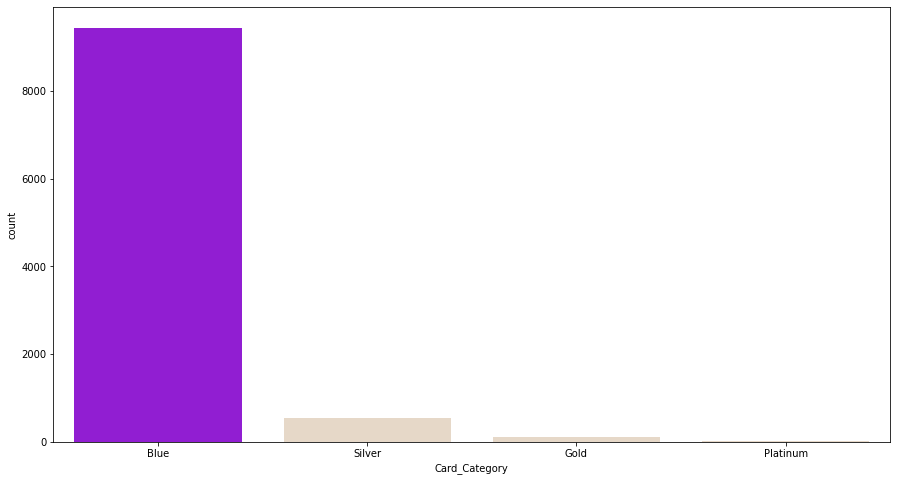

In [70]:
cust_card = customer_churn.Card_Category.value_counts().index

plt.figure(figsize=(15, 8))
sns.countplot(
    x="Card_Category",
    data=customer_churn,
    order=cust_card,
    palette=["#9900F0"] + (len(cust_card)-1)*["#EBD8C3"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Mayoritas kartu bank yang dimiliki customers adalah Blue Card.
* Hanya sedikit sekali customers yang memiliki Platinum Card

####Income terhadap card category

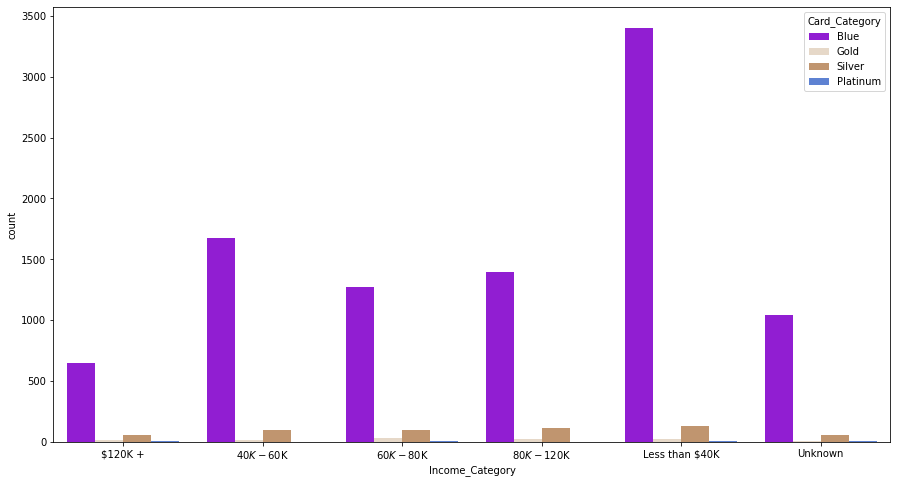

In [71]:
plt.figure(figsize=(15, 8))
sns.countplot(
    x="Income_Category",
    data=customer_churn,
    hue="Card_Category",
    order=sorted(customer_churn.Income_Category.unique()),
    palette=["#9900F0"] + ["#EBD8C3"] + ["#CE9461"] + ["#4B7BE5"]
)
plt.grid(False)
plt.show()

> **Insights:** 

* Pemilik Blue Card terbanyak adalah customers yang bergaji kurang dari 40 ribu dollar.
* Dengan ini, customers yang memiliki pemasukkan kurang dari 40 ribu dollar bisa diberikan pelayanan khusus atau reward atau hal-hal lain agar customers tersebut mau bertahan menggunakan kartu bank yang dimilikinya.
* Hal ini berarti, customers dengan income <$40k, menikah, memiliki tanggungan 2-3 orang, sudah lulus setingkat S1, wanita, dan pemilik blue card berkemungkinan besar berhenti menggunakan layanan bank.

#Data Preparation

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

In [73]:
sdss_df = pd.read_csv('/content/RGFile/BankChurners.csv', skiprows=0)

In [74]:
sdss_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [75]:
sdss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [76]:
sdss_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [77]:
sdss_df.columns.values

array(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype=object)

In [78]:
sdss_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
sdss_df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [79]:
sdss_df.columns.values

array(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype=object)

In [80]:
X = sdss_df.drop('Attrition_Flag', axis=1)
y = sdss_df['Attrition_Flag']

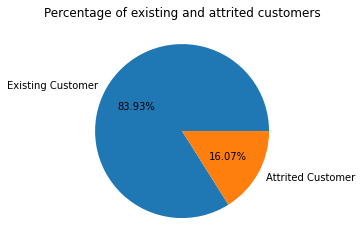

In [81]:
fig, ax = plt.subplots(figsize=(4, 4))
count = Counter(y)
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of existing and attrited customers')
plt.show()

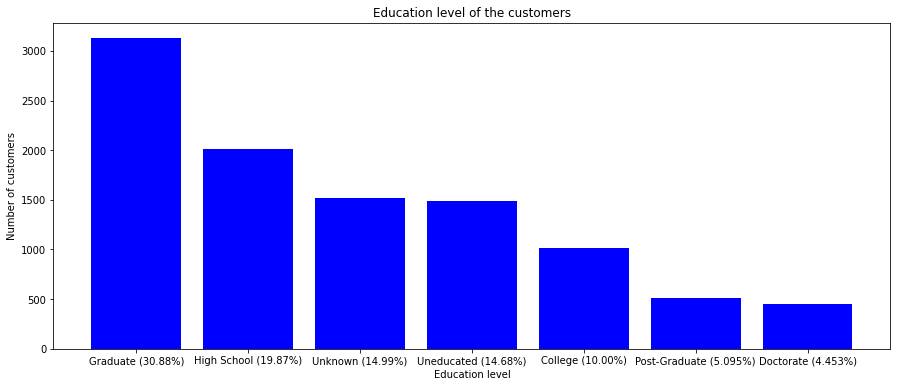

In [82]:
fig, ax = plt.subplots(figsize=(15, 6))
count = Counter(X['Education_Level'])
count = pd.Series(count).sort_values(ascending=False)
labels = []

for i in count.keys():
    labels.append(i + ' (' + str(count[i]/len(X['Education_Level'])*100)[:5] + '%)')

plt.bar(labels, count, color='blue')
plt.title('Education level of the customers')
plt.xlabel('Education level')
plt.ylabel('Number of customers')
plt.show()

#Modeling

In [83]:
cat_cols = ['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
le = LabelEncoder()
y = le.fit_transform(y)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
count = Counter(y_train)
print('Distribution of target 1 & 2:', count[1], '&', count[0])

Distribution of target 1 & 2: 6806 & 1295


In [86]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [87]:
count = Counter(y_train)
print('Distribution of target 1 & 2:', count[1], '&', count[0])

Distribution of target 1 & 2: 6806 & 6806


In [88]:
classifiers = [[XGBClassifier(),'XGB Classifier']]

In [89]:
score_list = []
cross_val_list = []
roc_auc_list = []

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)     
    score_list.append(score)
       
    print(model_name, 'model score:     ' + str(round(score*100, 2)) + '%')
       
    if model_name != classifiers[-1][1]:
        print('')

XGB Classifier model score:     94.62%


In [90]:
model = XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = model.score(X_test, y_test)

print('model score:     ' + str(round(score*100, 2)) + '%')



model score:     94.62%


In [91]:
y_pred = model.predict(X_test)

In [92]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [93]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9461994076999013

#Model Evaluation

In [94]:
model = XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = model.score(X_test, y_test)
cross_val = cross_val_score(model, X_test, y_test).mean()
roc_auc = roc_auc_score(y_test, pred)

print('model score:     ' + str(round(score*100, 2)) + '%')
print('cross val score: ' +str(round(cross_val*100, 2)) + '%') # Evaluate a score by cross-validation.
print('roc auc score:   ' + str(round(roc_auc*100, 2)) + '%')

model score:     94.62%
cross val score: 95.61%
roc auc score:   92.54%


#Deployment

Deployment adalah kegiatan yang bertujuan untuk menyebarkan aplikasi yang telah dikerjakan oleh para programmer. Cara penyebarannya pun beragam, tergantung dari jenis aplikasinya. Kalau kamu pilih aplikasi Web, maka kamu akan di-hosting pada server.

Tujuan utamanya yakni deployment target. Dapat diartikan sebagai sebuah sistem spesifikasi yang dialokasikan dalam deployment target.

Ada 7 (tujuh) langkah dalam proses pengembangan terkait deploy dan deployment, yaitu:

* Coding (pengodean)
* Building (pembangunan)
* Testing (pengujian)
* Packaging (pengemasan)
* Releasing (rilis)
* Configuring (konfigurasi)
* Monitoring (tahapan memonitor)